# Mnist DataSet 손글씨 인식 - Multiclass Classification

## 필요 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [2]:
tf.__version__

'2.13.0'

## 데이터 로드

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print([x.shape for x in [x_train, y_train, x_test, y_test]])

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]


In [8]:
x_train[0][15]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

## 데이터 시각화

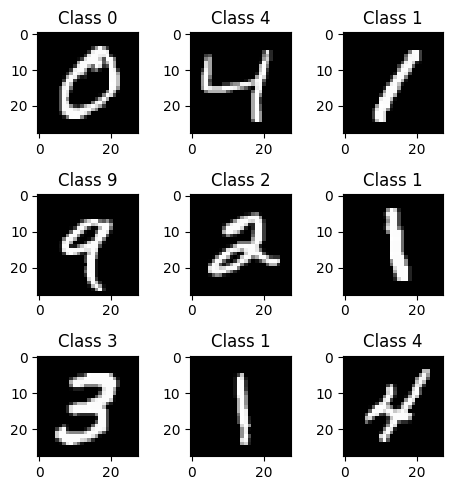

In [10]:
plt.figure(figsize=(5,5))

for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title(f'Class {y_train[i]}')
    plt.tight_layout()

plt.show()

## 데이터 전처리

### Dense layer 의 input 으로 만들기 위해 28 X 28 을 784 로 flatten

In [17]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [18]:
x_train_scaled = x_train.reshape(-1, 28 * 28).astype('float32')
x_test_scaled = x_test.reshape(-1, 28 * 28).astype('float32')

In [19]:
print([x.shape for x in [x_train_scaled, x_test_scaled, y_train, y_test]])

[(60000, 784), (10000, 784), (60000,), (10000,)]


### Target label 을 one-hot encoding
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]  
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]  
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]  
etc.

In [23]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

In [24]:
print([x.shape for x in [y_train_onehot, y_test_onehot]])

[(60000, 10), (10000, 10)]


## 모델링

### tf.data 를 이용한 shuffling and batch 구성

In [74]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train_scaled, y_train_onehot)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test_scaled, y_test_onehot)).shuffle(10000).batch(32)

In [76]:
for x, y in train_ds.take(1):
    print(x.shape, y.shape)

(32, 784) (32, 10)


### 모델 생성

In [77]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(128, input_shape=(784,)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                6

In [80]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 모델 학습

In [82]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3776 - accuracy: 0.8912 - val_loss: 0.2038 - val_accuracy: 0.9453
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3388 - accuracy: 0.9053 - val_loss: 0.2085 - val_accuracy: 0.9443
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.9194 - val_loss: 0.1944 - val_accuracy: 0.9487
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2747 - accuracy: 0.9237 - val_loss: 0.1728 - val_accuracy: 0.9535
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2539 - accuracy: 0.9314 - val_loss: 0.1876 - val_accuracy: 0.9554
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2338 - accuracy: 0.9373 - val_loss: 0.1579 - val_accuracy: 0.9605
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2203 - accuracy: 0.9400 - val_loss: 0.1771 - val_accuracy:

### 모델 평가

In [83]:
score = model.evaluate(test_ds)

313/313 [==============================] - 1s 2ms/step - loss: 0.1617 - accuracy: 0.9640


In [84]:
model.metrics_names

['loss', 'accuracy']

In [86]:
print(f'Test Loss= {score[0]:,.4f}')
print(f'Test Accuracy= {score[1]:,.4f}')

Test Loss= 0.1617
Test Accuracy= 0.9640


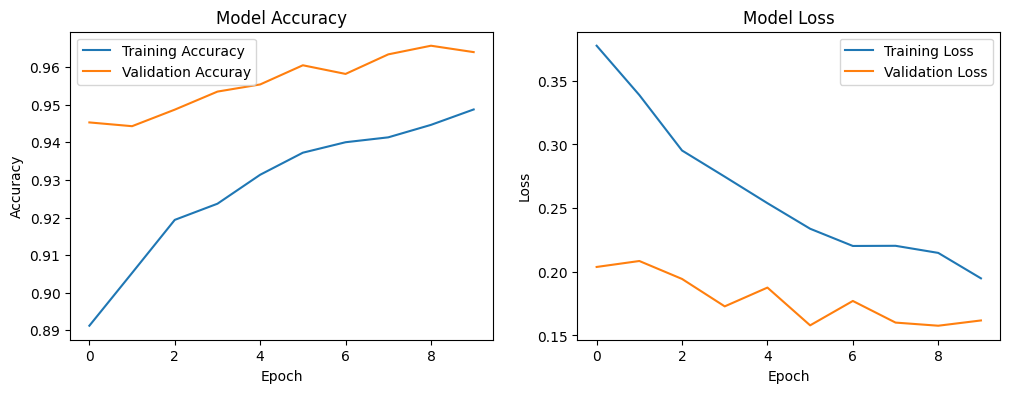

In [110]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuray')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 모델을 통한 예측

In [87]:
y_pred = model.predict(x_test_scaled)

313/313 [==============================] - 1s 1ms/step


In [92]:
y_pred = y_pred.argmax(axis=1)

In [93]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### 모델 예측 결과의 시각화

In [99]:
correct_indices = np.nonzero(y_test == y_pred)[0]
incorrect_indices = np.nonzero(y_test != y_pred)[0]

In [103]:
correct_indices.shape, incorrect_indices.shape

((9640,), (360,))

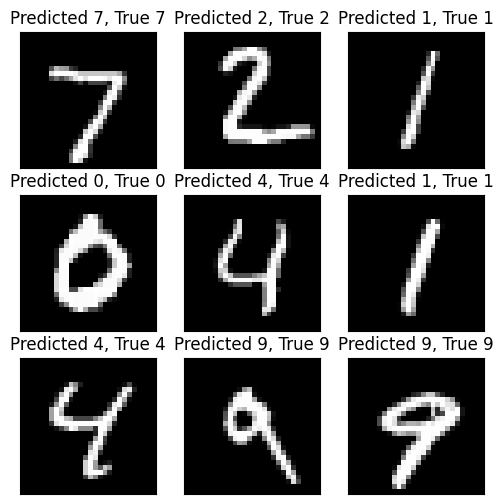

In [105]:
plt.figure(figsize=(6,6))

for i, idx in enumerate(correct_indices[:9], 1):
    plt.subplot(3,3,i)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'Predicted {y_pred[idx]}, True {y_test[idx]}')
    plt.xticks([])
    plt.yticks([])

plt.show()

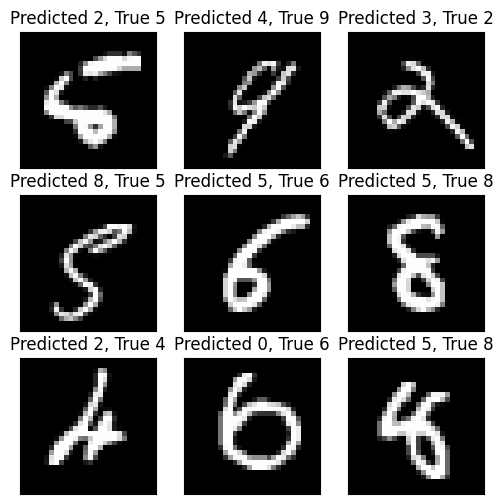

In [106]:
plt.figure(figsize=(6,6))

for i, idx in enumerate(incorrect_indices[:9], 1):
    plt.subplot(3,3,i)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'Predicted {y_pred[idx]}, True {y_test[idx]}')
    plt.xticks([])
    plt.yticks([])

plt.show()

In [116]:
model.predict(x_test[5].reshape(-1, 28*28)).argmax()

1/1 [==============================] - 0s 35ms/step


1

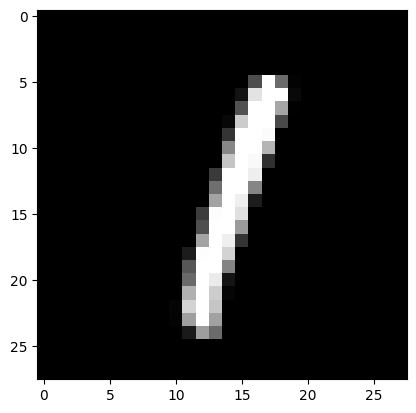

In [117]:
plt.imshow(x_test[5], cmap='gray')
plt.show()

# 실습1 : Fashion MNIST 를 이용하여 위와 동일한 작업

- Fashion MNIST 는 10 개 카테고리에 70,000 개의 회색조 이미지가 포함 된 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터 세트.  

- 이미지는 다음과 같이 저해상도 (28 x 28 픽셀)의 개별 의류 품목을 보여준다.  

- 여기서 60,000 개의 이미지를 사용하여 네트워크를 훈련시키고 10,000 개의 이미지를 사용하여 네트워크가 이미지를 분류하는 방법을 얼마나 정확하게 학습했는지 평가   

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
</table>

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

## 필요 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [2]:
tf.__version__

'2.13.0'

## 데이터 로드

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
print([x.shape for x in [x_train, y_train, x_test, y_test]])

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## EDA 및 데이터 시각화

In [7]:
x_train[0][9]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
       173,   0], dtype=uint8)

In [31]:
y_train[0], class_names[y_train[0]]

(9, 'Ankle boot')

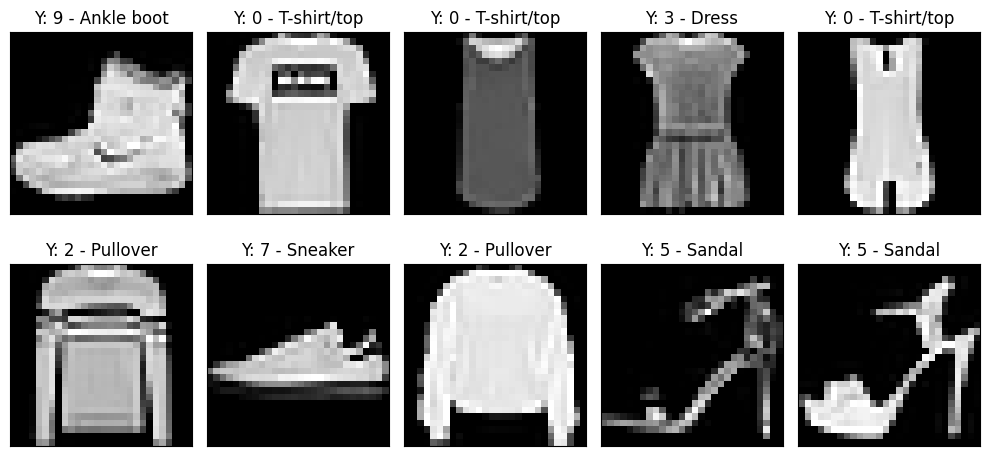

In [33]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Y: {y_train[i]} - {class_names[y_train[i]]}')

plt.tight_layout()
plt.show()

## 데이터 전처리

### Shape 확인

In [36]:
print([x.shape for x in [x_train, y_train, x_test, y_test]])

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]


### Feature Scaling

In [47]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [48]:
print([x.shape for x in [x_train_scaled, y_train, x_test_scaled, y_test]])

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]


In [49]:
x_train_scaled[0][9]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.71764706, 0.88235294,
       0.84705882, 0.8745098 , 0.89411765, 0.92156863, 0.89019608,
       0.87843137, 0.87058824, 0.87843137, 0.86666667, 0.8745098 ,
       0.96078431, 0.67843137, 0.        ])

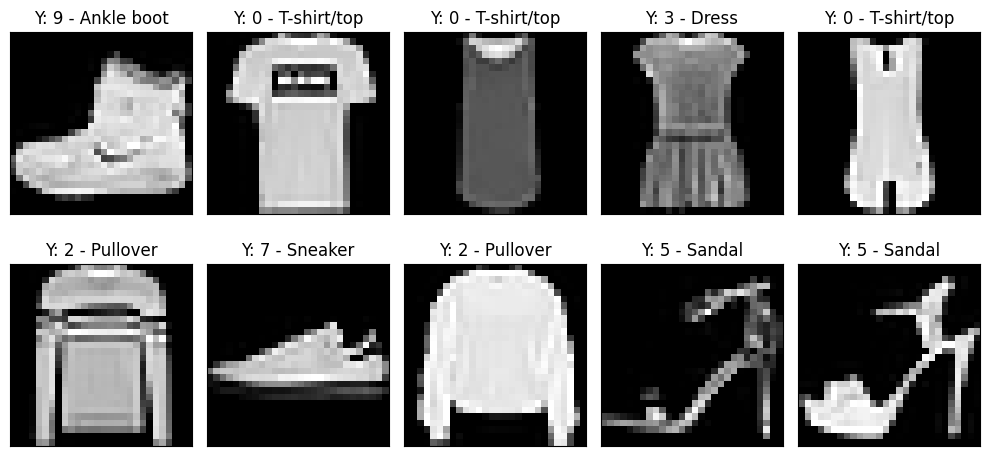

In [50]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_scaled[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Y: {y_train[i]} - {class_names[y_train[i]]}')

plt.tight_layout()
plt.show()

### 2차원 Data를 1차원으로 Flatten

In [52]:
x_train_scaled = x_train_scaled.reshape(-1, 28*28).astype('float32')
x_test_scaled = x_test_scaled.reshape(-1, 28*28).astype('float32')

In [53]:
print([x.shape for x in [x_train_scaled, y_train, x_test_scaled, y_test]])

[(60000, 784), (60000,), (10000, 784), (10000,)]


### One-Hot Encoding

In [58]:
y_train_onehot = tf.keras.utils.to_categorical(y_train).astype('int')
y_test_onehot = tf.keras.utils.to_categorical(y_test).astype('int')

### Data Shuffling & Batch

In [59]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train_scaled, y_train_onehot)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test_scaled, y_test_onehot)).shuffle(10000).batch(32)

In [60]:
for x, y in train_ds.take(1):
    print(x.shape, y.shape)

(32, 784) (32, 10)


## 모델링

### 모델 생성

In [62]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=64, input_shape=(784,), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.summary(show_trainable=True)

Model: "sequential_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 dense_1 (Dense)             (None, 64)                50240     Y          
                                                                            
 dropout_1 (Dropout)         (None, 64)                0         Y          
                                                                            
 dense_2 (Dense)             (None, 32)                2080      Y          
                                                                            
 dropout_2 (Dropout)         (None, 32)                0         Y          
                                                                            
 dense_3 (Dense)             (None, 10)                330       Y          
                                                                            
Total params: 52650 (205.66 KB)
Trainable params: 5265

### 모델 학습

In [66]:
hisotry = model.fit(train_ds, epochs=30, validation_data=test_ds, verbose=2)

Epoch 1/30
1875/1875 - 5s - loss: 0.6754 - accuracy: 0.7615 - val_loss: 0.4546 - val_accuracy: 0.8353 - 5s/epoch - 2ms/step
Epoch 2/30
1875/1875 - 4s - loss: 0.4815 - accuracy: 0.8287 - val_loss: 0.4128 - val_accuracy: 0.8534 - 4s/epoch - 2ms/step
Epoch 3/30
1875/1875 - 4s - loss: 0.4397 - accuracy: 0.8432 - val_loss: 0.4029 - val_accuracy: 0.8520 - 4s/epoch - 2ms/step
Epoch 4/30
1875/1875 - 4s - loss: 0.4165 - accuracy: 0.8541 - val_loss: 0.3899 - val_accuracy: 0.8593 - 4s/epoch - 2ms/step
Epoch 5/30
1875/1875 - 4s - loss: 0.4032 - accuracy: 0.8571 - val_loss: 0.3826 - val_accuracy: 0.8569 - 4s/epoch - 2ms/step
Epoch 6/30
1875/1875 - 5s - loss: 0.3889 - accuracy: 0.8599 - val_loss: 0.3904 - val_accuracy: 0.8617 - 5s/epoch - 2ms/step
Epoch 7/30
1875/1875 - 5s - loss: 0.3782 - accuracy: 0.8639 - val_loss: 0.3675 - val_accuracy: 0.8660 - 5s/epoch - 2ms/step
Epoch 8/30
1875/1875 - 4s - loss: 0.3718 - accuracy: 0.8655 - val_loss: 0.3638 - val_accuracy: 0.8694 - 4s/epoch - 2ms/step
Epoch 9/

### 모델 평가

In [67]:
scores = model.evaluate(test_ds)

313/313 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8784


In [80]:
model.metrics_names

['loss', 'accuracy']

In [81]:
print(f'Model Loss=     {scores[0]:,.4f}')
print(f'Model Accuracy= {scores[1]:,.4f}')

Model Loss=     0.3462
Model Accuracy= 0.8784


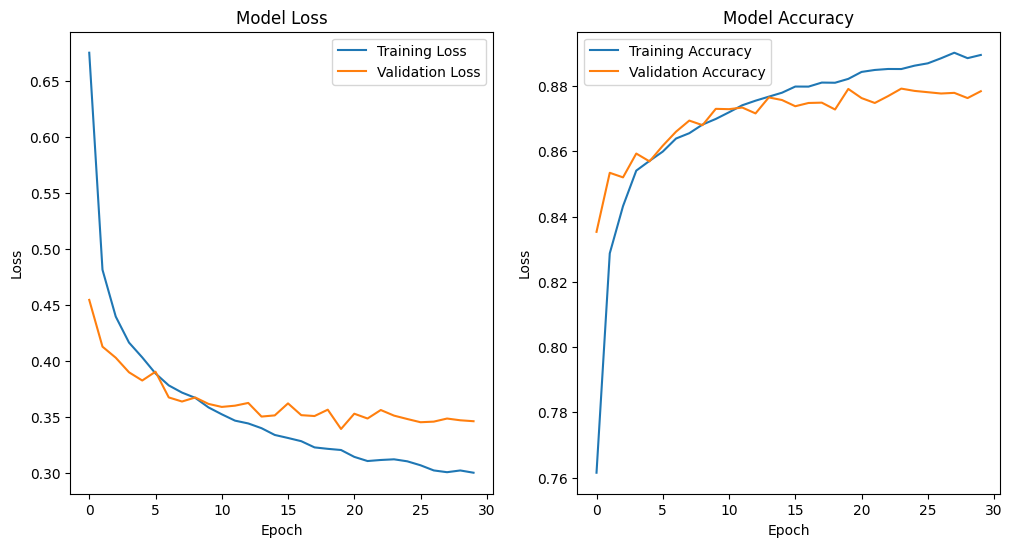

In [88]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(hisotry.history['loss'], label='Training Loss')
plt.plot(hisotry.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hisotry.history['accuracy'], label='Training Accuracy')
plt.plot(hisotry.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Accuracy')
plt.legend()

plt.show()

### 모델을 통한 예측

In [90]:
y_predicted = model.predict(x_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [94]:
y_pred = y_predicted.argmax(axis=1)

In [107]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [95]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

### 예측 결과 시각화

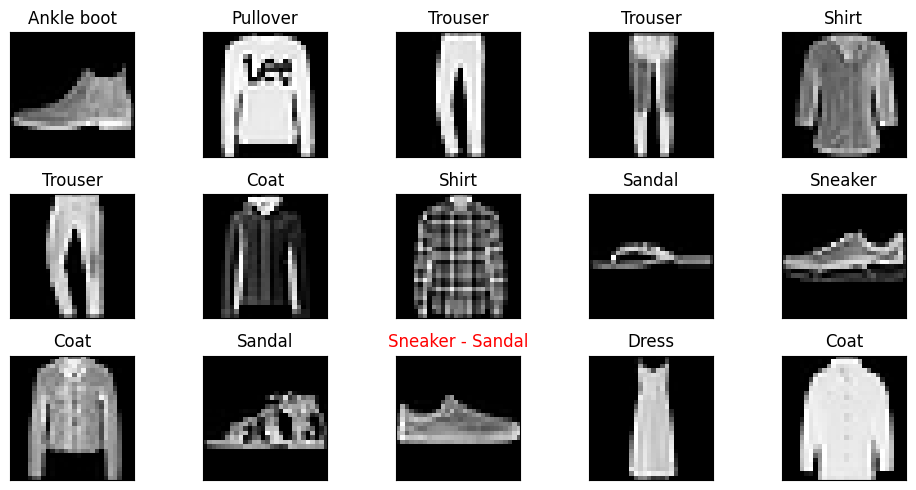

In [108]:
plt.figure(figsize=(10, 5))

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    if y_test[i] == y_pred[i]:
        plt.title(f'{class_names[y_test[i]]}')
    else:
        plt.title(f'{class_names[y_test[i]]} - {class_names[y_pred[i]]}', color='red')

plt.tight_layout()
plt.show()

In [116]:
correct = np.nonzero(y_test == y_pred)[0]
incorrect = np.nonzero(y_test != y_pred)[0]

In [118]:
correct.shape, incorrect.shape

((8784,), (1216,))

# 실습2 : Fashion MNIST 를 이용하여 위와 동일한 작업

## 필요 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [2]:
tf.__version__

'2.13.0'

## 데이터 로드

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print([x.shape for x in [x_train, y_train, x_test, y_test]])

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]


## EDA 및 데이터 시각화

In [6]:
x_train[0][9]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
       173,   0], dtype=uint8)

In [7]:
y_train[0]

9

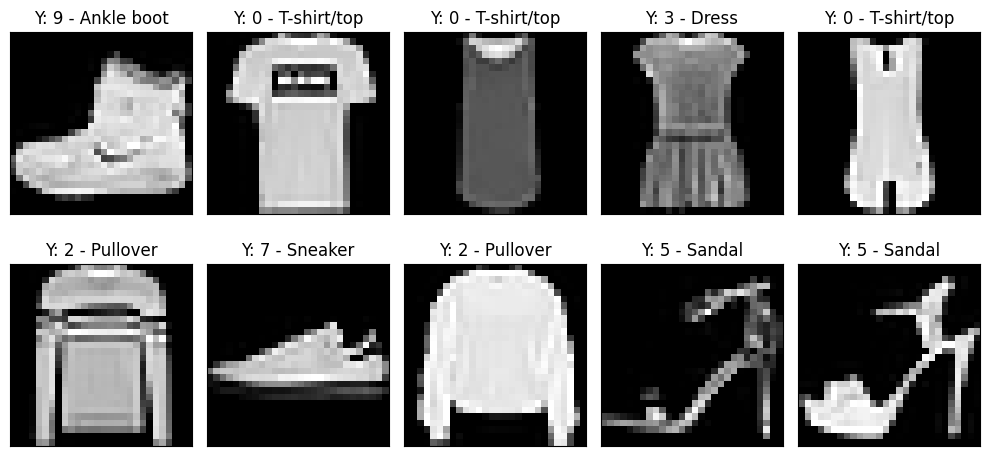

In [8]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Y: {y_train[i]} - {class_names[y_train[i]]}')

plt.tight_layout()
plt.show()

## 데이터 전처리

### Shape 확인

In [9]:
print([x.shape for x in [x_train, y_train, x_test, y_test]])

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]


### Feature Scaling

In [10]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

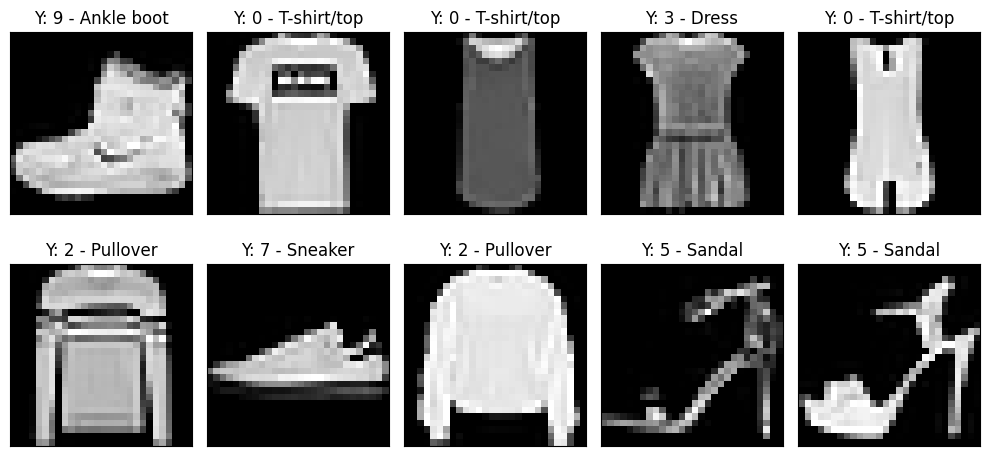

In [11]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_scaled[i], cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Y: {y_train[i]} - {class_names[y_train[i]]}')

plt.tight_layout()
plt.show()

In [12]:
x_train_scaled = x_train_scaled.reshape(-1, 28*28).astype('float32')
x_test_scaled = x_test_scaled.reshape(-1, 28*28).astype('float32')

In [13]:
print([x.shape for x in [x_train_scaled, y_train, x_test_scaled, y_test]])

[(60000, 784), (60000,), (10000, 784), (10000,)]


### One-Hot Encoding

In [14]:
y_train_scaled = tf.keras.utils.to_categorical(y_train).astype('int')
y_test_scaled = tf.keras.utils.to_categorical(y_test).astype('int')

In [15]:
print([x.shape for x in [x_train_scaled, y_train_scaled, x_test_scaled, y_test_scaled]])

[(60000, 784), (60000, 10), (10000, 784), (10000, 10)]


## 모델링

### 모델 생성

In [16]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=64, input_shape=(28 * 28, ), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 모델 학습

In [18]:
history = model.fit(x_train_scaled, y_train_scaled, batch_size=32, epochs=30, validation_data=(x_test_scaled, y_test_scaled))

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6727 - accuracy: 0.7645 - val_loss: 0.4502 - val_accuracy: 0.8375
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4745 - accuracy: 0.8321 - val_loss: 0.4418 - val_accuracy: 0.8420
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4370 - accuracy: 0.8433 - val_loss: 0.3940 - val_accuracy: 0.8590
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4137 - accuracy: 0.8504 - val_loss: 0.4109 - val_accuracy: 0.8535
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3990 - accuracy: 0.8575 - val_loss: 0.3769 - val_accuracy: 0.8639
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3881 - accuracy: 0.8592 - val_loss: 0.3830 - val_accuracy: 0.8624
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3767 - accuracy: 0.8635 - val_loss: 0.3728 - val_accuracy:

### 모델 평가

In [19]:
scores = model.evaluate(x_test_scaled, y_test_scaled, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3585 - accuracy: 0.8753


In [20]:
model.metrics_names

['loss', 'accuracy']

In [21]:
print(f'Model Loss=     {scores[0]:,.4f}')
print(f'Model Accuracy= {scores[1]:,.4f}')

Model Loss=     0.3585
Model Accuracy= 0.8753


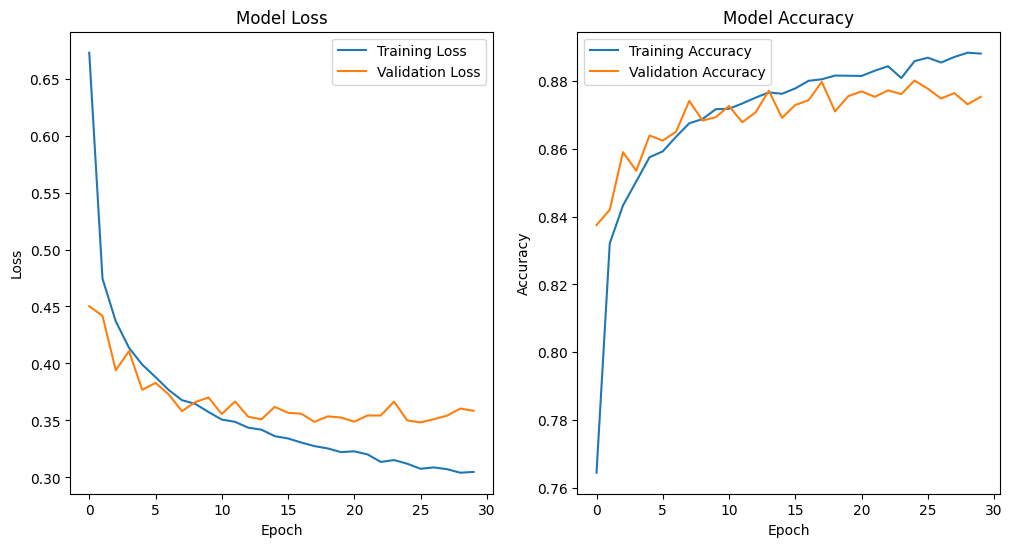

In [22]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.show()

### 모델을 통한 예측

In [23]:
y_pred = model.predict(x_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [24]:
y_pred

array([[1.46196433e-08, 2.95357751e-07, 1.41779744e-09, ...,
        2.25572344e-02, 4.27036362e-09, 9.75936890e-01],
       [7.33557144e-08, 2.82912020e-14, 9.94812727e-01, ...,
        3.12541733e-21, 1.03603124e-11, 3.31067764e-24],
       [2.60325650e-17, 1.00000000e+00, 1.62769483e-20, ...,
        7.98499113e-31, 8.96738019e-27, 1.51076168e-28],
       ...,
       [1.54641511e-05, 3.00263842e-11, 1.37588021e-08, ...,
        1.16824628e-09, 9.99914408e-01, 3.33921918e-10],
       [7.59036722e-11, 9.99999523e-01, 5.85089377e-13, ...,
        6.44036949e-16, 2.14580246e-14, 2.77202875e-13],
       [1.81355472e-10, 1.25896409e-17, 2.90087344e-13, ...,
        1.79876843e-05, 8.56007247e-08, 1.22296569e-07]], dtype=float32)

In [25]:
y_pred = y_pred.argmax(axis=1)

In [26]:
correct = np.nonzero(y_test == y_pred)[0]
incorrect = np.nonzero(y_test != y_pred)[0]

In [27]:
correct.shape, incorrect.shape

((8753,), (1247,))

### 예측 결과 시각화

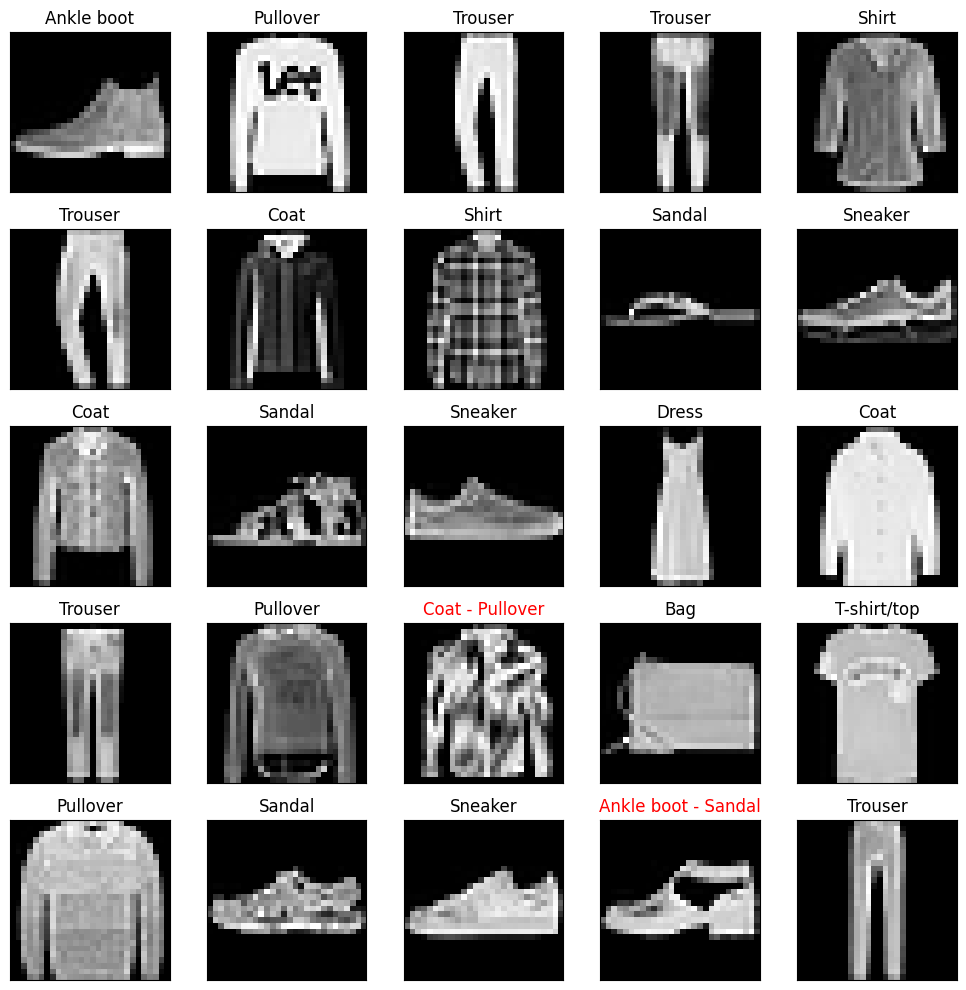

In [29]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    if y_test[i] == y_pred[i]:
        plt.title(f'{class_names[y_test[i]]}')
    else:
        plt.title(f'{class_names[y_test[i]]} - {class_names[y_pred[i]]}', color='red')

plt.tight_layout()
plt.show()